# Importar librerías y datos

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data_students=pd.read_csv('datasets/clean_students_complete.csv',index_col=0).set_index('Student ID')
data_students.head()

,student_name,gender,grade,school_name,reading_score,math_score
Student ID,,,,,,
0,Paul Bradley,M,9th,Huang High School,66,79
1,Victor Smith,M,12th,Huang High School,94,61
2,Kevin Rodriguez,M,12th,Huang High School,90,60
3,Richard Scott,M,12th,Huang High School,67,58
4,Bonnie Ray,F,9th,Huang High School,97,84


# Actividad: Básica

Crea / Presenta un algoritmo que genere los datos de "reading_score" y "math_score", en variables categóricas, y guárdalo en dos columnas diferentes (cada columna nueva representa la nueva columna con variables categórica).

In [10]:
# generar copia del dataframe original
df=data_students.copy()
# categorías basadas en exámenes internacionales de inglés
# categorizar reading_score en una nueva columna
df['cat_read']=np.where(df['reading_score']>=90,'outstanding',np.where(df['reading_score']>=70,'pass','fail'))
# categorizar math_score en una nueva columna
df['cat_math']=np.where(df['math_score']>=90,'outstanding',np.where(df['math_score']>=70,'pass','fail'))
# mostrar nuevo dataframe
df.head(10)

,student_name,gender,grade,school_name,reading_score,math_score,cat_read,cat_math
Student ID,,,,,,,,
0,Paul Bradley,M,9th,Huang High School,66,79,fail,pass
1,Victor Smith,M,12th,Huang High School,94,61,outstanding,fail
2,Kevin Rodriguez,M,12th,Huang High School,90,60,outstanding,fail
3,Richard Scott,M,12th,Huang High School,67,58,fail,fail
4,Bonnie Ray,F,9th,Huang High School,97,84,outstanding,pass
5,Bryan Miranda,M,9th,Huang High School,94,94,outstanding,outstanding
6,Sheena Carter,F,11th,Huang High School,82,80,pass,pass
7,Nicole Baker,F,12th,Huang High School,96,69,outstanding,fail
8,Michael Roth,M,10th,Huang High School,95,87,outstanding,pass


Crea / Presenta una gráfica que condense la información obtenida ahora categóricamente.

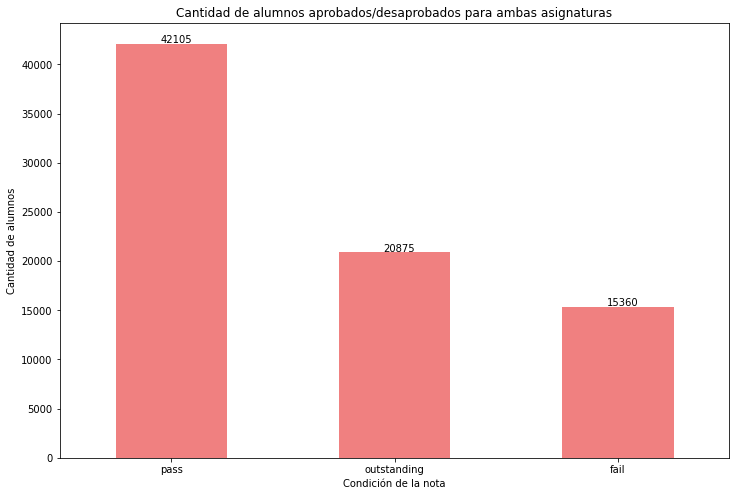

In [31]:
# dataframe flag para apilar cada columna
df_flag=pd.concat([df.cat_read,df.cat_math],axis=0)
# plotear las tres categorías en un barplot y ver el total de aprobados(outstanding, pass) y desaprobados(fail)
# en ambas asignaturas
df_flag.value_counts().plot(kind='bar',figsize=(12,8),rot=0,color='lightcoral')
# anotar cantidades en las barras
valores=df_flag.value_counts().tolist()
for i in range(len(valores)):
    plt.text(i-0.05,valores[i]+100,valores[i])
# etiquetas y títulos
plt.title('Cantidad de alumnos aprobados/desaprobados para ambas asignaturas')
plt.xlabel('Condición de la nota')
plt.ylabel('Cantidad de alumnos')
plt.show()

# Actividad: Avanzada

In [32]:
# generar copia del dataframe original
df=data_students.copy()
# categorías basadas en exámenes internacionales de inglés
# categorizar reading_score en una nueva columna
df['cat_read']=np.where(df['reading_score']>=90,'outstanding',np.where(df['reading_score']>=70,'pass','fail'))
# categorizar math_score en una nueva columna
df['cat_math']=np.where(df['math_score']>=90,'outstanding',np.where(df['math_score']>=70,'pass','fail'))
# mostrar nuevo dataframe
df.head(10)

,student_name,gender,grade,school_name,reading_score,math_score,cat_read,cat_math
Student ID,,,,,,,,
0,Paul Bradley,M,9th,Huang High School,66,79,fail,pass
1,Victor Smith,M,12th,Huang High School,94,61,outstanding,fail
2,Kevin Rodriguez,M,12th,Huang High School,90,60,outstanding,fail
3,Richard Scott,M,12th,Huang High School,67,58,fail,fail
4,Bonnie Ray,F,9th,Huang High School,97,84,outstanding,pass
5,Bryan Miranda,M,9th,Huang High School,94,94,outstanding,outstanding
6,Sheena Carter,F,11th,Huang High School,82,80,pass,pass
7,Nicole Baker,F,12th,Huang High School,96,69,outstanding,fail
8,Michael Roth,M,10th,Huang High School,95,87,outstanding,pass


Crea / Presenta una gráfica que condense la información obtenida ahora categóricamente mostrando que género obtuvo mejor puntaje.

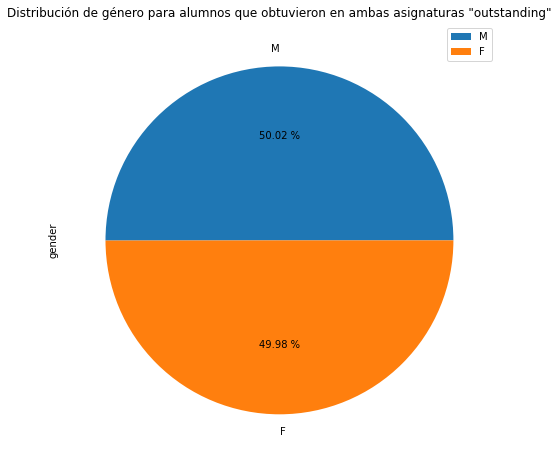

In [41]:
# se extrae el dataframe donde ambas categorías sean outstanding
df_best_students=df.loc[(df.cat_read=='outstanding')&(df.cat_math=='outstanding'),'gender'].copy()
# se plotea en pie plot el género que obtuvo mejor puntaje para ambas categorías
df_best_students.value_counts().plot.pie(figsize=(8,8),autopct='%.2f %%')
# titulo
plt.title('Distribución de género para alumnos que obtuvieron en ambas asignaturas "outstanding"')
plt.legend()
plt.show()